<a href="https://colab.research.google.com/github/Fayeemshaik/Health-insurance-cost-prediction-deep-learning-/blob/main/DL_insurance_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT ON HEALTH INSURANCE CLAIM AMOUNT PREDICTION**


##**problem statement**
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

##**Data Definition**
**age** : Age of the policyholder (Numeric)

**sex**: Gender of policyholder (Categoric)

**weight**: Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents**: Number of dependent persons on the policyholder (Numeric)

**smoker**: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim**: The amount claimed by the policyholder (Numeric)

**bloodpressure**: Bloodpressure reading of policyholder (Numeric)

**diabetes**: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex**: A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title**: Job profile of the policyholder (Categoric)

**city**: The city in which the policyholder resides (Categoric)

**hereditary_diseases**: A policyholder suffering from a hereditary diseases or not (Categoric)

#**importing libraries**

In [93]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

In [94]:
import tensorflow as tf
import keras

#**importing dataset**

In [95]:
df=pd.read_csv("/content/drive/MyDrive/Academic_projects/DMMLT_project/healthinsurance.csv")
df.sample(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
5843,45.0,male,54,NaN,NoDisease,0,1,Raleigh,66,1,0,Farmer,62592.9
8277,18.0,male,52,26.1,NoDisease,0,0,Buffalo,66,0,0,Student,1708.9


In [96]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [97]:
df.drop(['city'],axis=1,inplace=True)

In [98]:
#convertng to appropriate data types
df['smoker']=df['smoker'].astype(object)
df['diabetes']=df['diabetes'].astype(object)
df['regular_ex']=df['regular_ex'].astype(object)

In [99]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

In [100]:
#checking for missing values
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

#**Visualize Missing Values using Heatmap**

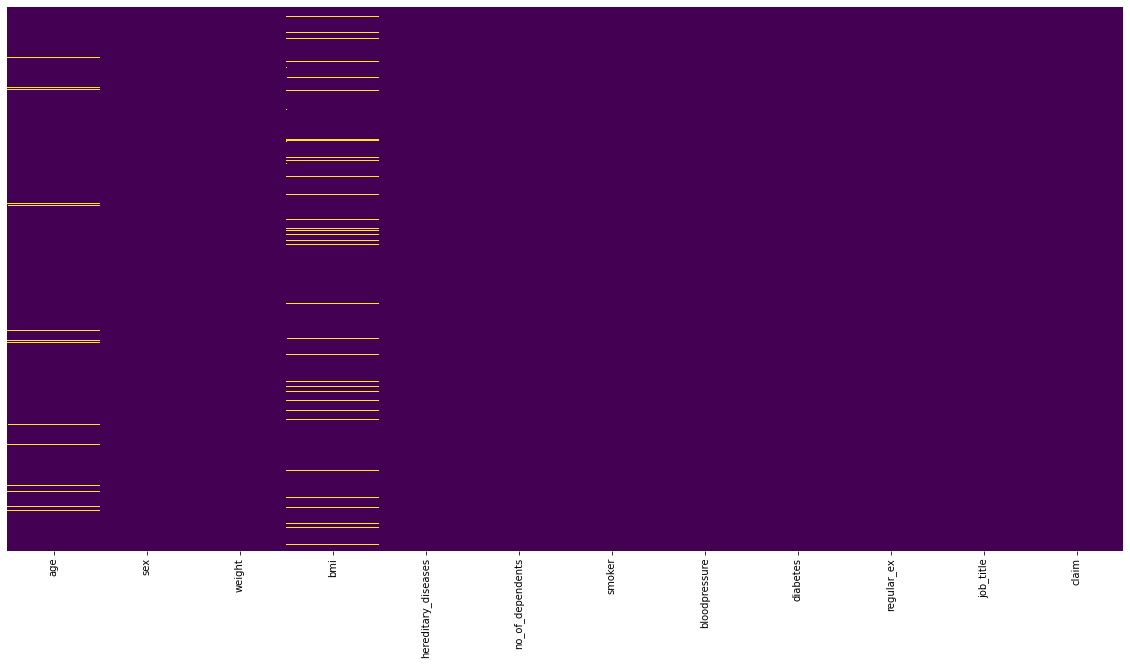

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [102]:
#missing values treatment
df['age'].fillna(value=df['age'].mean(),inplace= True)
df['bmi'].fillna(value=df['bmi'].mean(),inplace= True)

In [103]:
#after treatment missing values
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

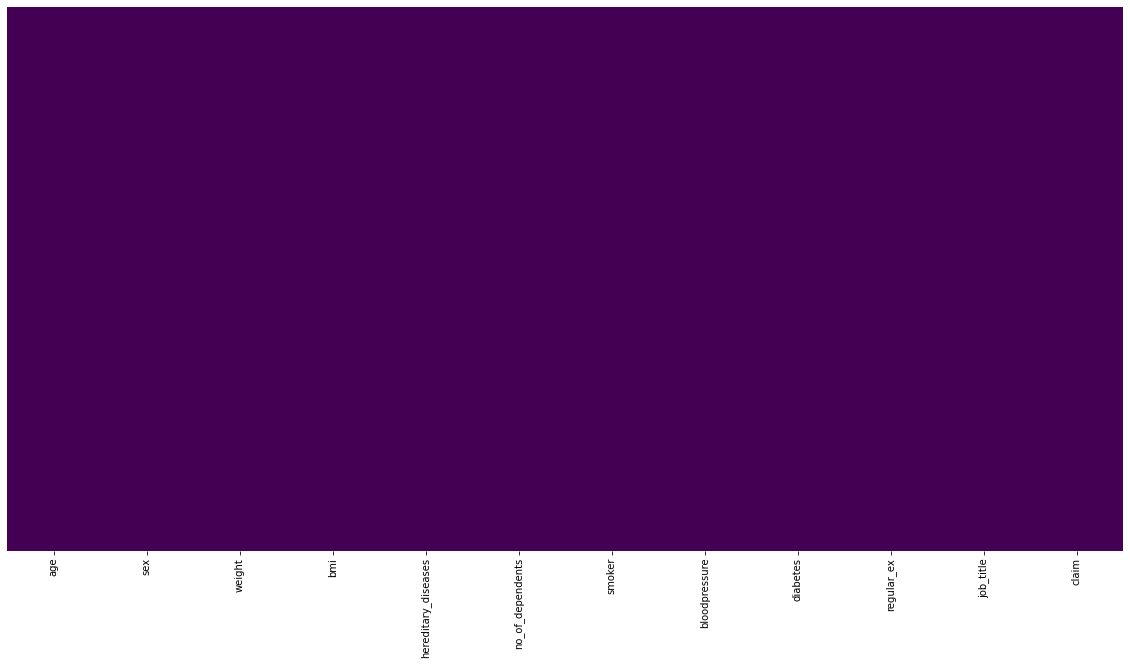

In [104]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [59]:
#creating dummy variables for categorical variables
df=pd.get_dummies(df,drop_first=True)
df.sample(2)

,age,weight,bmi,no_of_dependents,bloodpressure,claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,...,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician
3580,23.0,56,35.0,3,0,4466.6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9110,34.0,65,22.4,2,78,27375.9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df.shape

(15000, 53)

In [61]:
#independent and depndent
x=df.drop(['claim'],axis=1)
y=pd.DataFrame(df.claim)

In [62]:
y

,claim
0,13112.6
1,9567.0
2,32734.2
3,48517.6
4,1731.7
...,...
14995,21082.2
14996,7512.3
14997,1391.5
14998,9144.6


In [63]:
x

,age,weight,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,...,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician
0,60.0,64,24.3,1,72,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49.0,75,22.6,1,78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32.0,64,17.8,2,88,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,61.0,53,36.4,1,72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19.0,50,20.6,0,82,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,49,28.3,1,54,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,39.0,74,29.6,4,64,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14997,20.0,62,33.3,0,52,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,52.0,88,36.7,0,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#feature scaling :standardzation

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
y_scaled=sc.fit_transform(y)
#need for feature scaling in deep learning is for faster computation and calculation of derivaties and updation of weights,bias easily

In [65]:
x_scaled

array([[ 1.47892959, -0.066387  , -1.00708994, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.68351375,  0.73644611, -1.2940384 , ..., -0.22844814,
        -0.31063037, -0.13867034],
       [-0.54576526, -0.066387  , -2.1042458 , ..., -0.22844814,
        -0.31063037, -0.13867034],
       ...,
       [-1.41349163, -0.21235666,  0.51204893, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.90044535,  1.68524887,  1.08594584, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [ 0.90044535, -0.57728079, -0.65262421, ..., -0.22844814,
        -0.31063037, -0.13867034]])

In [66]:
y_scaled

array([[-0.02377688],
       [-0.31564783],
       [ 1.59145748],
       ...,
       [-0.98864843],
       [-0.35041946],
       [ 1.03651085]])

#Test train split

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.2)

In [68]:
x_train

array([[-0.18421261, -0.65026562,  1.00154924, ...,  4.37736111,
        -0.31063037, -0.13867034],
       [-0.25652314, -0.21235666,  0.59644554, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [-1.3411811 , -0.94220493, -0.58510692, ..., -0.22844814,
        -0.31063037, -0.13867034],
       ...,
       [-0.47345473, -0.21235666, -0.50071032, ..., -0.22844814,
        -0.31063037, -0.13867034],
       [-0.83500739,  0.07958266, -1.2940384 , ..., -0.22844814,
        -0.31063037, -0.13867034],
       [-1.55811269, -0.65026562, -0.99021062, ..., -0.22844814,
        -0.31063037, -0.13867034]])

In [69]:
y_train

array([[ 0.47854309],
       [-0.6605241 ],
       [-0.97689324],
       ...,
       [ 2.04821378],
       [ 0.11136655],
       [-0.96876834]])

#Hyperparameters
finding the appropriate number of layers,neurons,activation functions,batch size,epochs,etc requried to get the best model.

In [70]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization,Dropout

In [71]:
def create_model(layers,activation):
  model=Sequential()
  for i, nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes,input_dim=x_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
  model.add(Dense(units=1))
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['accuracy']
  )
  return model

In [72]:
model = KerasClassifier(build_fn=create_model,verbose=0)

<ipython-input-72-d4b295176c51>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,verbose=0)


In [ ]:
layers = [[52,52,52],[20,20,20],[30,30,30]]
activations = ['elu','relu']
param_grid = dict(layers=layers,activation=activations,epochs=[50,100])
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_result=grid.fit(x_train,y_train)

In [ ]:
print(grid_result.best_score_,grid_result.best_params_)

findings suggest that a model with


*   3 layers
*   each with 52 neurons
*   50 epochs
*   elu activation function









#**MODEL BUILDING (ANN)**

In [73]:
model=keras.models.Sequential([
    keras.layers.Dense(units=52,input_dim = 52,activation="elu",kernel_initializer='he_normal'),
      
    keras.layers.Dense(units=52,activation="elu",kernel_initializer='he_normal'),
 
    keras.layers.Dense(units=52,activation="elu",kernel_initializer='he_normal'),
   
    keras.layers.Dense(units=1)
]
    
)
model.compile(
    loss="mae",
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['mae']

)

In [74]:
model.fit(x_train,y_train,validation_split=0.1,epochs=50)

Epoch 1/50
338/338 [==============================] - 1s 3ms/step - loss: 0.4476 - mae: 0.4476 - val_loss: 0.3025 - val_mae: 0.3025
Epoch 2/50
338/338 [==============================] - 1s 3ms/step - loss: 0.2735 - mae: 0.2735 - val_loss: 0.2494 - val_mae: 0.2494
Epoch 3/50
338/338 [==============================] - 1s 3ms/step - loss: 0.2362 - mae: 0.2362 - val_loss: 0.2189 - val_mae: 0.2189
Epoch 4/50
338/338 [==============================] - 1s 3ms/step - loss: 0.2196 - mae: 0.2196 - val_loss: 0.2110 - val_mae: 0.2110
Epoch 5/50
338/338 [==============================] - 1s 3ms/step - loss: 0.2027 - mae: 0.2027 - val_loss: 0.1892 - val_mae: 0.1892
Epoch 6/50
338/338 [==============================] - 1s 3ms/step - loss: 0.1925 - mae: 0.1925 - val_loss: 0.1920 - val_mae: 0.1920
Epoch 7/50
338/338 [==============================] - 1s 3ms/step - loss: 0.1848 - mae: 0.1848 - val_loss: 0.1860 - val_mae: 0.1860
Epoch 8/50
338/338 [==============================] - 1s 3ms/step - loss: 0.

In [75]:
model.evaluate(x_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.1067 - mae: 0.1067


[0.10673107951879501, 0.10673107951879501]

In [76]:
y_pred=model.predict(x_test)

94/94 [==============================] - 0s 1ms/step


In [77]:
y_pred

array([[ 2.6972392 ],
       [-0.4946013 ],
       [-0.33997244],
       ...,
       [ 0.3775047 ],
       [-0.17921178],
       [ 2.6141558 ]], dtype=float32)

In [78]:
y_test

array([[ 2.70448712],
       [-0.50019924],
       [-0.37292552],
       ...,
       [ 1.03651085],
       [-0.19655664],
       [ 2.5518097 ]])

In [79]:
from sklearn import metrics

r2= metrics.r2_score(y_test,y_pred)
print("R_square value : ",r2)

R_square value :  0.9457244436004562


In [80]:
mse1= metrics.mean_squared_error(y_test,y_pred)
print("mean square error: ", mse1)

mean square error:  0.054290184569238266
